In [12]:
def euclid(x1, x2):
  assert len(x1) == len(x2), 'len x1 != len x2'
  return sum([(x1_i - x2_i) ** 2 for x1_i, x2_i in zip(x1, x2)]) ** 0.5

In [32]:
import numpy as np

#KMeans реализация
class KMeans:
  def __init__(self, K):
    self.K = K

  def fit(self, X):
    #случайная инициализация K кластеров
    clusters = np.random.randn(self.K, 2)
    for d in range(len(X[0, :])):
      clusters[:, d] = clusters[:, d] * (X[:, d].max() - X[:, d].min()) + X[:, d].min()

    iter = 10
    while iter > 0:
      iter -= 1
      #для каждого из обьектов указываем индекс ближайшего кластера
      cluster_objects = {}
      for i in range(len(X)):
        x = X[i, :]
        min_dist = None
        for j in range(self.K):
          if not min_dist or euclid(x, clusters[j]) > min_dist:
            min_dist = euclid(x, clusters[j])
            j_ = j

        if j_ not in cluster_objects:
          cluster_objects[j_] = [x]
        else:
          cluster_objects[j_].append(x)  

      #обновляем координаты каждого из кластеров
      for j in range(self.K):
        for d in range(len(X[0, :])):
          if j in cluster_objects:
            clusters[j][d] = sum([el[d] for el in cluster_objects[j]]) / len(cluster_objects[j])

    self.clusters = clusters


  def predict(self, x):
    min_dist = None
    for j in range(self.K):
      if not min_dist or euclid(x, self.clusters[j]) > min_dist:
        min_dist = euclid(x, self.clusters[j])
        j_ = j
    
    return j_

In [44]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

data = make_blobs(1000, random_state=1)
X = data[0]

model = KMeans(3)

model.fit(X)

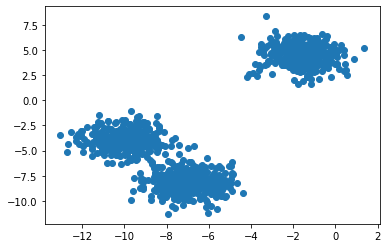

In [85]:
plt.scatter(data[0][:, 0], data[0][:, 1])
None

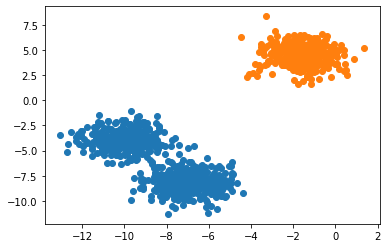

In [86]:
y = np.array([model.predict(x) for x in X])
for j in range(len(model.clusters)):
  indexes = np.arange(len(y))[y == j]
  if len(indexes) > 0:
    plt.scatter(X[indexes, :][:, 0], X[indexes, :][:, 1])
None